In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('C:/Users/muzna/anaconda_projects/ecommerce_cleaned.csv', parse_dates=['InvoiceDate'])

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,INV100000,NOTE350,Notebook A4,1,2020-02-21 10:00:48,17.60,C2309,USA,17.60
1,INV100001,NOTE189,Notebook A4,2,2023-10-17 19:51:22,26.51,C2508,Spain,53.02
2,INV100002,PEN338,"Pen, Blue Ink",1,2020-07-10 07:57:37,13.11,C1065,Germany,13.11
3,INV100003,PHONEC818,Phone Charger,1,2021-02-11 23:39:41,20.79,C1054,Germany,20.79
4,INV100004,HEADPH928,Headphones,1,2023-04-21 10:07:43,17.36,C1451,Germany,17.36


In [4]:
# Quick KPIs
total_revenue = df['TotalPrice'].sum()
total_customers = df['CustomerID'].nunique()
avg_order_value = df.groupby('InvoiceNo')['TotalPrice'].sum().mean()

print(f"Revenue: {total_revenue}, Customers: {total_customers}, AOV: {avg_order_value:.2f}")


Revenue: 937724.0799999998, Customers: 2000, AOV: 46.89


In [5]:
# Invoice month
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M').astype(str)

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,InvoiceMonth
0,INV100000,NOTE350,Notebook A4,1,2020-02-21 10:00:48,17.60,C2309,USA,17.60,2020-02
1,INV100001,NOTE189,Notebook A4,2,2023-10-17 19:51:22,26.51,C2508,Spain,53.02,2023-10
2,INV100002,PEN338,"Pen, Blue Ink",1,2020-07-10 07:57:37,13.11,C1065,Germany,13.11,2020-07
3,INV100003,PHONEC818,Phone Charger,1,2021-02-11 23:39:41,20.79,C1054,Germany,20.79,2021-02
4,INV100004,HEADPH928,Headphones,1,2023-04-21 10:07:43,17.36,C1451,Germany,17.36,2023-04


In [6]:
# RFM
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
}).reset_index().rename(columns={'InvoiceDate':'Recency','InvoiceNo':'Frequency','TotalPrice':'Monetary'})

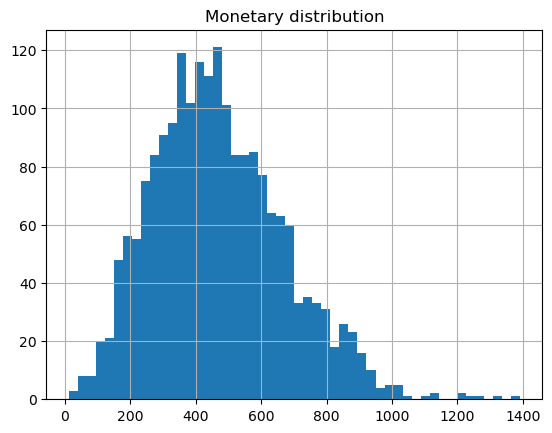

In [7]:
# Quick plots
rfm['Monetary'].hist(bins=50)
plt.title('Monetary distribution')
plt.show()
